# Importing the libraries

In [ ]:
# Importing the libraries
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
# tqdm package to have a progressive bar during data extraction
from tqdm import tqdm
# A module which contains statistical functions
from scipy import stats
# Opens the passed URL in a browser
import webbrowser
# String Manipulation
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import hvplot.pandas
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import lightgbm
from lightgbm import  LGBMRegressor
import xgboost
from xgboost import XGBRegressor

In [ ]:
!pip install hvplot

# Web scrapping

In [ ]:
url = "https://www.century21.com/real-estate/denver-co/LCCODENVER/?sa=CCOARVADA%2CCCOAURORA%2CCCOBRIGHTON%2CCCOBROOMFIELD%2CCCOCOMMERCECITY%2CCCOENGLEWOOD%2CCCOHENDERSON%2CCCOLAFAYETTE%2CCCOLITTLETON%2CCCOLOUISVILLE%2CCCOMORRISON%2CCCOTHORNTON%2CCCOWESTMINSTER%2CCCOWHEATRIDGE&p=1"
r= requests.get(url, headers={'User-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0'})

# Storing the content (HTML code) of website
c= r.content
r.status_code

200

In [ ]:
# Make the code more readable
# Create BeautifulSoup object

soup= bts(c,"html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html data-usagetrack-config='{"clickDefault": "ga-event", "viewDefault": "ga-event", "viewOnReady": true}' lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="minimum-scale=1.0, width=device-width, maximum-scale=1, user-scalable=no" name="viewport"/>
  <meta content="Denver Real Estate | Find Houses &amp; Homes for Sale in Denver, CO" name="title"/>
  <meta content="Search Denver real estate property listings to find homes for sale in Denver, CO. Browse houses for sale in Denver today!" name="description">
   <meta content="Denver real estate, Denver homes, Denver homes for sale, Denver properties, Denver listings, Denver houses for sale, CO real estate, CO homes, CO homes for sale, CO properties, CO listings, CO houses for sale" name="keywords">
    <title>
     Denver Rea

In [ ]:
# Extracting all the div elements containing property data 
all= soup.find_all("div",{"class":"infinite-container"})    


In [ ]:
all

[<div class="infinite-container">
 <div class="infinite-item property-card clearfix property-card-CBR52170464" data-brand-cd="CBR" data-id="CBR52170464" data-latitude="39.6604886" data-link="/property/8832-e-dartmouth-avenue-denver-co-80231-CBR52170464" data-listing-id="" data-longitude="-104.88773865" data-mls="6692187" data-source-id="64CAED86-EAF7-4661-9243-05911299024D" data-zip="80231">
 <div class="property-card-clip"> <div class="property-card-image" style="background-image: url(https://cb.azureedge.net/1206i82/vg5qww78jj714vp6smvxqbjm97i82);">
 <div class="property-image-flag newly-listed">Newly Listed</div>
 <div class="property-image-count">
 <div class="image-count-left">&lt;</div>
 <div class="image-count-current">1</div>
 <div class="image-count-total">40</div>
 <div class="image-count-right">&gt;</div>
 </div>
 </div>
 </div>
 <div class="property-card-primary-info">
 <div class="pdp-listing-type sale">FOR SALE</div>
 <a class="listing-price" href="/property/8832-e-dartmo

In [ ]:
# Extracting price from the first div element in all

all[0].find("a",{"class":"listing-price"}).text.strip().replace("\n","").replace(" ","")         

'$595,000'

In [ ]:
properties = soup.find_all("div", {"class": "property-card-primary-info"})
properties

[<div class="property-card-primary-info">
 <div class="pdp-listing-type sale">FOR SALE</div>
 <a class="listing-price" href="/property/8832-e-dartmouth-avenue-denver-co-80231-CBR52170464">
          
             
                $595,000
             
             
          
       </a>
 <div class="col-wrap-mid">
 <div class="property-beds">
 <strong>3</strong> beds
          </div>
 <div class="property-baths">
 <strong>2</strong> baths
          </div>
 </div>
 <div class="col-wrap-last">
 <div class="property-half-baths">
 <strong>1</strong> half bath
          </div>
 <div class="property-sqft">
 <strong>2,366</strong> sq. ft
          </div>
 </div>
 <div class="property-address-info">
 <div class="property-address" title="8832 E Dartmouth Avenue">
                8832 E Dartmouth Avenue
             </div>
 <div class="property-city">
             Denver CO 80231
          </div>
 </div>
 <div class="property-card-attribution">
                Courtesy Of Coldwell Banker South

In [ ]:
len(properties)

20

In [ ]:
properties[0]

<div class="property-card-primary-info">
<div class="pdp-listing-type sale">FOR SALE</div>
<a class="listing-price" href="/property/8832-e-dartmouth-avenue-denver-co-80231-CBR52170464">
         
            
               $595,000
            
            
         
      </a>
<div class="col-wrap-mid">
<div class="property-beds">
<strong>3</strong> beds
         </div>
<div class="property-baths">
<strong>2</strong> baths
         </div>
</div>
<div class="col-wrap-last">
<div class="property-half-baths">
<strong>1</strong> half bath
         </div>
<div class="property-sqft">
<strong>2,366</strong> sq. ft
         </div>
</div>
<div class="property-address-info">
<div class="property-address" title="8832 E Dartmouth Avenue">
               8832 E Dartmouth Avenue
            </div>
<div class="property-city">
            Denver CO 80231
         </div>
</div>
<div class="property-card-attribution">
               Courtesy Of Coldwell Banker Southeast Metro (DTC)
            
      

In [ ]:
all_info = []

for i in properties:
  info = {}
  info['Title'] = i.find("div", {"class": "pdp-listing-type sale"}).text
  info['Price'] = i.find("a", {"class":"listing-price"}).text.strip()
  info['Beds'] = i.find("div", {"class": "property-beds"}).text.strip()
  info['Bath'] = i.find("div", {"class": "property-baths"}).text.strip()
  info['SqFt'] = i.find("div", {"class": "property-sqft"}).text.strip()
  info['city_info'] = i.find("div", {"class": "property-city"}).text.split()[-1]

  all_info.append(info)     
           

In [ ]:
print(all_info)

[{'Title': 'FOR SALE', 'Price': '$595,000', 'Beds': '3 beds', 'Bath': '2 baths', 'SqFt': '2,366 sq. ft', 'city_info': '80231'}, {'Title': 'FOR SALE', 'Price': '$360,000', 'Beds': '2 beds', 'Bath': '2 baths', 'SqFt': '936 sq. ft', 'city_info': '80204'}, {'Title': 'FOR SALE', 'Price': '$499,950', 'Beds': '3 beds', 'Bath': '1 bath', 'SqFt': '2,112 sq. ft', 'city_info': '80233'}, {'Title': 'FOR SALE', 'Price': '$350,000', 'Beds': '3 beds', 'Bath': '2 baths', 'SqFt': '1,144 sq. ft', 'city_info': '80003'}, {'Title': 'FOR SALE', 'Price': '$843,030', 'Beds': '4 beds', 'Bath': '4 baths', 'SqFt': '4,571 sq. ft', 'city_info': '80016'}, {'Title': 'FOR SALE', 'Price': '$625,000', 'Beds': '4 beds', 'Bath': '2 baths', 'SqFt': '1,918 sq. ft', 'city_info': '80228'}, {'Title': 'FOR SALE', 'Price': '$606,620', 'Beds': '3 beds', 'Bath': '2 baths', 'SqFt': '3,607 sq. ft', 'city_info': '80018'}, {'Title': 'FOR SALE', 'Price': '$588,265', 'Beds': '3 beds', 'Bath': '2 baths', 'SqFt': '2,793 sq. ft', 'city_inf

In [ ]:
len(all_info)

20

In [ ]:
all_properties = []

for i in tqdm(range(1,34)):
  r = requests.get(f"https://www.century21.com/real-estate/denver-co/LCCODENVER/?sa=CCOARVADA%2CCCOAURORA%2CCCOBRIGHTON%2CCCOBROOMFIELD%2CCCOCOMMERCECITY%2CCCOENGLEWOOD%2CCCOHENDERSON%2CCCOLAFAYETTE%2CCCOLITTLETON%2CCCOLOUISVILLE%2CCCOMORRISON%2CCCOTHORNTON%2CCCOWESTMINSTER%2CCCOWHEATRIDGE&searchKey=f505681d-a16a-4836-a430-9ea664844d0b&o=comingsoon-asc&p={i}",
      headers={'User-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0'})
  
  properties = soup.find_all("div", {"class": "property-card-primary-info"})
  for item in properties:
    info = {}
    info['Title'] = item.find("div", {"class": "pdp-listing-type sale"}).text
    info['Price'] = item.find("a", {"class":"listing-price"}).text.strip()
    info['Beds'] = item.find("div", {"class": "property-beds"}).text.strip()
    info['Bath'] = item.find("div", {"class": "property-baths"}).text.strip()
    info['SqFt'] = item.find("div", {"class": "property-sqft"}).text.strip()
    info['city_info'] = item.find("div", {"class": "property-city"}).text.split()[-1]

    all_properties.append(info)
print(all_properties)








100%|██████████| 33/33 [00:13<00:00,  2.44it/s]

[{'Title': 'FOR SALE', 'Price': '$595,000', 'Beds': '3 beds', 'Bath': '2 baths', 'SqFt': '2,366 sq. ft', 'city_info': '80231'}, {'Title': 'FOR SALE', 'Price': '$360,000', 'Beds': '2 beds', 'Bath': '2 baths', 'SqFt': '936 sq. ft', 'city_info': '80204'}, {'Title': 'FOR SALE', 'Price': '$499,950', 'Beds': '3 beds', 'Bath': '1 bath', 'SqFt': '2,112 sq. ft', 'city_info': '80233'}, {'Title': 'FOR SALE', 'Price': '$350,000', 'Beds': '3 beds', 'Bath': '2 baths', 'SqFt': '1,144 sq. ft', 'city_info': '80003'}, {'Title': 'FOR SALE', 'Price': '$843,030', 'Beds': '4 beds', 'Bath': '4 baths', 'SqFt': '4,571 sq. ft', 'city_info': '80016'}, {'Title': 'FOR SALE', 'Price': '$625,000', 'Beds': '4 beds', 'Bath': '2 baths', 'SqFt': '1,918 sq. ft', 'city_info': '80228'}, {'Title': 'FOR SALE', 'Price': '$606,620', 'Beds': '3 beds', 'Bath': '2 baths', 'SqFt': '3,607 sq. ft', 'city_info': '80018'}, {'Title': 'FOR SALE', 'Price': '$588,265', 'Beds': '3 beds', 'Bath': '2 baths', 'SqFt': '2,793 sq. ft', 'city_inf

In [ ]:
len(all_properties)

660

In [ ]:
all_properties


[{'Bath': '2 baths',
  'Beds': '3 beds',
  'Price': '$595,000',
  'SqFt': '2,366 sq. ft',
  'Title': 'FOR SALE',
  'city_info': '80231'},
 {'Bath': '2 baths',
  'Beds': '2 beds',
  'Price': '$360,000',
  'SqFt': '936 sq. ft',
  'Title': 'FOR SALE',
  'city_info': '80204'},
 {'Bath': '1 bath',
  'Beds': '3 beds',
  'Price': '$499,950',
  'SqFt': '2,112 sq. ft',
  'Title': 'FOR SALE',
  'city_info': '80233'},
 {'Bath': '2 baths',
  'Beds': '3 beds',
  'Price': '$350,000',
  'SqFt': '1,144 sq. ft',
  'Title': 'FOR SALE',
  'city_info': '80003'},
 {'Bath': '4 baths',
  'Beds': '4 beds',
  'Price': '$843,030',
  'SqFt': '4,571 sq. ft',
  'Title': 'FOR SALE',
  'city_info': '80016'},
 {'Bath': '2 baths',
  'Beds': '4 beds',
  'Price': '$625,000',
  'SqFt': '1,918 sq. ft',
  'Title': 'FOR SALE',
  'city_info': '80228'},
 {'Bath': '2 baths',
  'Beds': '3 beds',
  'Price': '$606,620',
  'SqFt': '3,607 sq. ft',
  'Title': 'FOR SALE',
  'city_info': '80018'},
 {'Bath': '2 baths',
  'Beds': '3 bed

In [ ]:
# Converting the list of dictionaries (l) into a dataframe

import pandas as pd

df= pd.DataFrame(all_properties)

In [ ]:
# Saving the dataframe into a csv file

df.to_csv("Output.csv")

# Load the data

In [ ]:
df

,Title,Price,Beds,Bath,SqFt,city_info
0,FOR SALE,"$595,000",3 beds,2 baths,"2,366 sq. ft",80231
1,FOR SALE,"$360,000",2 beds,2 baths,936 sq. ft,80204
2,FOR SALE,"$499,950",3 beds,1 bath,"2,112 sq. ft",80233
3,FOR SALE,"$350,000",3 beds,2 baths,"1,144 sq. ft",80003
4,FOR SALE,"$843,030",4 beds,4 baths,"4,571 sq. ft",80016
...,...,...,...,...,...,...
655,FOR SALE,"$646,200",3 beds,3 baths,"2,507 sq. ft",80027
656,FOR SALE,"$620,000",2 beds,1 bath,"1,084 sq. ft",80202
657,FOR SALE,"$1,400,000",4 beds,2 baths,"3,088 sq. ft",80206
658,FOR SALE,"$775,000",6 beds,4 baths,"4,968 sq. ft",80016


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      660 non-null    object
 1   Price      660 non-null    object
 2   Beds       660 non-null    object
 3   Bath       660 non-null    object
 4   SqFt       660 non-null    object
 5   city_info  660 non-null    object
dtypes: object(6)
memory usage: 31.1+ KB


In [ ]:
df.describe()

,Title,Price,Beds,Bath,SqFt,city_info
count,660,660,660,660,660,660
unique,1,19,5,4,20,13
top,FOR SALE,"$775,000",3 beds,2 baths,"3,097 sq. ft",80018
freq,660,66,363,429,33,99


# Data Processing

In [ ]:
df['Bath']= df['Bath'].apply(lambda x : x.replace('s',''))

In [ ]:
df['Bath'] = df['Bath'].apply(lambda x : x.replace('bath',''))

In [ ]:
df['Beds'] = df['Beds'].apply( lambda x : x.replace('beds',''))
df['Beds']

In [ ]:
df['Beds'] = df['Beds'].apply( lambda x : x.replace('bed',''))

In [ ]:
df['Price'] = df['Price'].apply(lambda x : x.replace('$',''))

In [ ]:
df['Price'] = df['Price'].apply(lambda x : x.replace(',',''))

In [ ]:
df['SqFt'] = df['SqFt'].apply(lambda x : x.replace('sq. ft',''))

In [ ]:
df['SqFt'] = df['SqFt'].apply(lambda x : x.replace(',',''))

In [ ]:
# type conversion
df[['Price','SqFt','Beds','Bath']]= df[['Price','SqFt','Beds','Bath']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      660 non-null    object
 1   Price      660 non-null    int64 
 2   Beds       660 non-null    int64 
 3   Bath       660 non-null    int64 
 4   SqFt       660 non-null    int64 
 5   city_info  660 non-null    object
dtypes: int64(4), object(2)
memory usage: 31.1+ KB


# Exploratory Data Analysis

In [ ]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Price,660.0,691434.50,373454.119689,350000.0,499987.50,600810.0,745675.00,2000000.0
Beds,660.0,3.30,0.954663,2.0,3.00,3.0,4.00,6.0
Bath,660.0,2.25,0.767067,1.0,2.00,2.0,2.25,4.0
SqFt,660.0,2546.40,1090.528375,936.0,1830.25,2436.5,3170.00,4968.0


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
Title,660,1,FOR SALE,660
city_info,660,13,80018,99


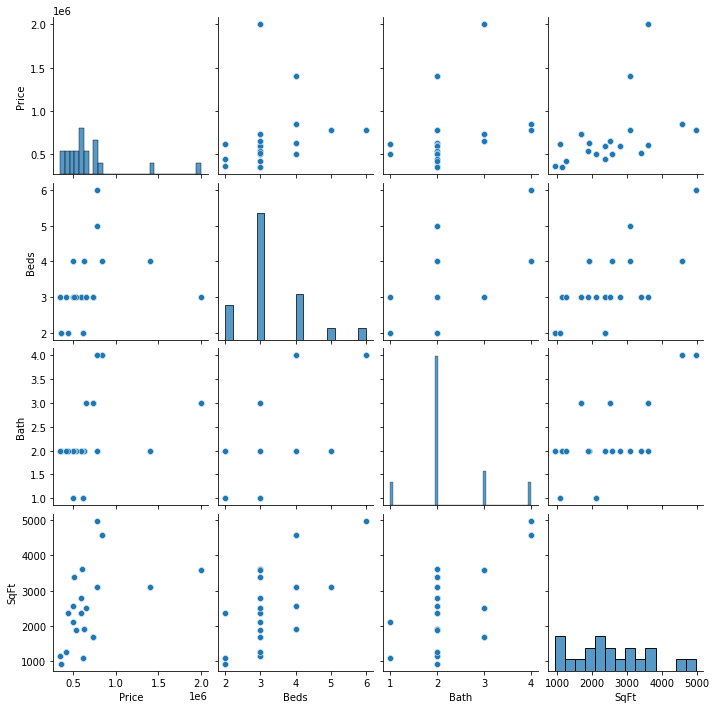

In [ ]:
sns.pairplot(df)
plt.show()

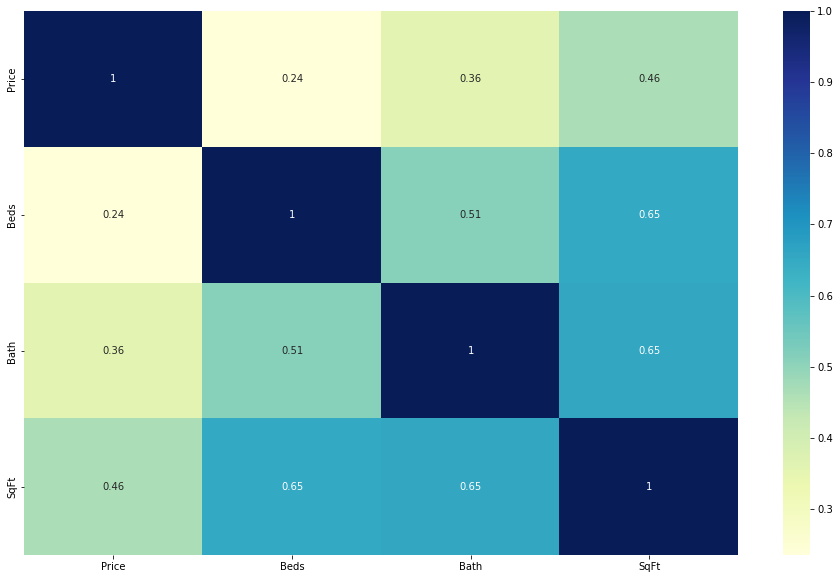

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

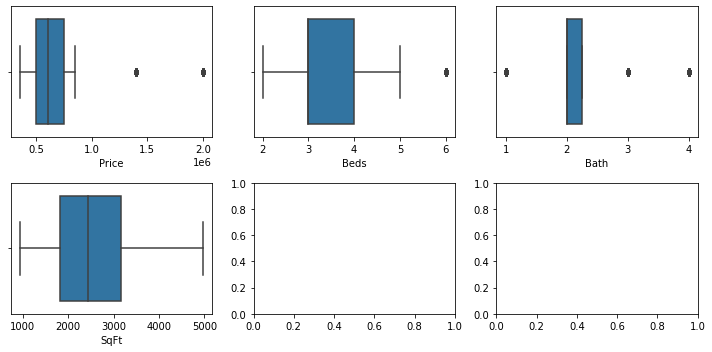

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['Price'], ax = axs[0,0])
plt2 = sns.boxplot(df['Beds'], ax = axs[0,1])
plt3 = sns.boxplot(df['Bath'], ax = axs[0,2])
plt1 = sns.boxplot(df['SqFt'], ax = axs[1,0])


plt.tight_layout();

# Handling with categorical values

## One hot coding

In [ ]:
df_one_hot = pd.get_dummies(df,columns=['city_info'],prefix=['ZipCode'])
df_one_hot.head()

,Title,Price,Beds,Bath,SqFt,ZipCode_80003,ZipCode_80016,ZipCode_80018,ZipCode_80027,ZipCode_80031,ZipCode_80202,ZipCode_80204,ZipCode_80206,ZipCode_80226,ZipCode_80228,ZipCode_80231,ZipCode_80233,ZipCode_80249
0,FOR SALE,595000,3,2,2366,0,0,0,0,0,0,0,0,0,0,1,0,0
1,FOR SALE,360000,2,2,936,0,0,0,0,0,0,1,0,0,0,0,0,0
2,FOR SALE,499950,3,1,2112,0,0,0,0,0,0,0,0,0,0,0,1,0
3,FOR SALE,350000,3,2,1144,1,0,0,0,0,0,0,0,0,0,0,0,0
4,FOR SALE,843030,4,4,4571,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_one_hot.columns

Index(['Title', 'Price', 'Beds', 'Bath', 'SqFt', 'ZipCode_80003',
       'ZipCode_80016', 'ZipCode_80018', 'ZipCode_80027', 'ZipCode_80031',
       'ZipCode_80202', 'ZipCode_80204', 'ZipCode_80206', 'ZipCode_80226',
       'ZipCode_80228', 'ZipCode_80231', 'ZipCode_80233', 'ZipCode_80249'],
      dtype='object')

In [ ]:
X = df_one_hot[['Beds', 'Bath', 'SqFt', 'ZipCode_80003',
       'ZipCode_80016', 'ZipCode_80018', 'ZipCode_80027', 'ZipCode_80031',
       'ZipCode_80202', 'ZipCode_80204', 'ZipCode_80206', 'ZipCode_80226',
       'ZipCode_80228', 'ZipCode_80231', 'ZipCode_80233', 'ZipCode_80249']]
y = df_one_hot[['Price']]

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple linear regression

## Model

In [ ]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[ 1.02951879e+05  3.06342693e+05  1.13715426e+02 -1.17529147e+19
  -1.17529147e+19 -1.17529147e+19 -1.17529147e+19 -1.17529147e+19
  -1.17529147e+19 -1.17529147e+19 -1.17529147e+19 -1.17529147e+19
  -1.17529147e+19 -1.17529147e+19 -1.17529147e+19 -1.17529147e+19]]
[1.17529147e+19]


In [ ]:
pred = lin_reg.predict(X_test)

In [ ]:
# burda b0 ve b1 degerini alacagiz, b1 = intercep, b0 = coef 
print(' Intercept : {} '.format (lin_reg.intercept_))
print(' Coef : {} '.format (lin_reg.coef_))
print(' Model Score: {}'.format(lin_reg.score(X,y)))
# model Score ( rkare) : Bagimli degiskendeki degisikligin, bagimsiz degiskenlerce aciklanma yuzdesidir.Yani elimizde bagimsiz degiskenleri kulladigimizda, hedef degiskendeki degisikligin yuzde kacini aciklayabiliyoruz. 

 Intercept : [1.17529147e+19] 
 Coef : [[ 1.02951879e+05  3.06342693e+05  1.13715426e+02 -1.17529147e+19
  -1.17529147e+19 -1.17529147e+19 -1.17529147e+19 -1.17529147e+19
  -1.17529147e+19 -1.17529147e+19 -1.17529147e+19 -1.17529147e+19
  -1.17529147e+19 -1.17529147e+19 -1.17529147e+19 -1.17529147e+19]] 
 Model Score: 0.9104034922756469


## Model Tunning CV

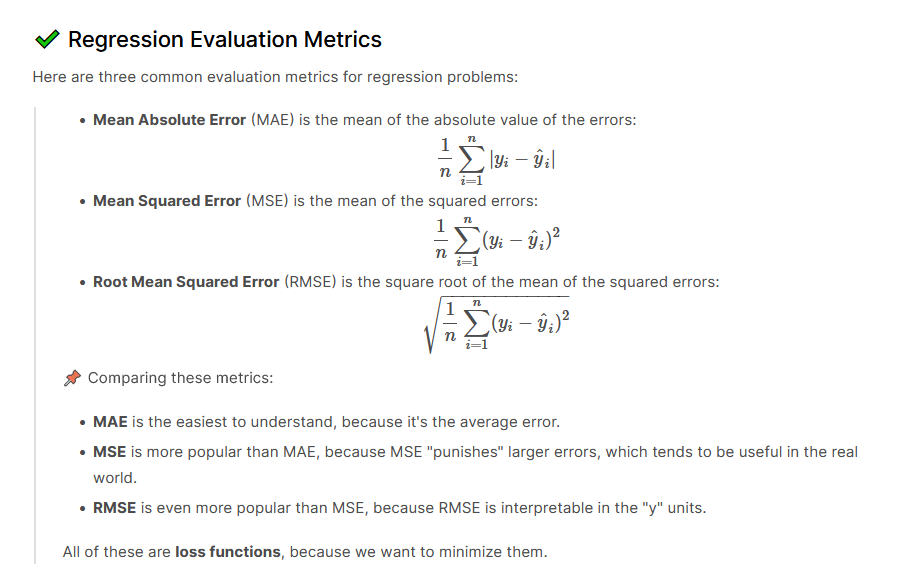

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)
print_evaluate(y_test, test_pred)
print_evaluate(y_train, train_pred)

MAE: 83826.65909090909
MSE: 13287770975.901516
RMSE: 115272.59420999215
R2 Square 0.8965832585164194
__________________________________
MAE: 78748.46022727272
MSE: 12275499844.149622
RMSE: 110794.85477290732
R2 Square 0.9135158537189224
__________________________________


## Results linear regression

In [ ]:
results = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,83826.659091,1.328777e+10,115272.59421,0.896583,0.910746


# Ridge Model

In [ ]:
ridge_model = Ridge(alpha=0.0005, random_state=13).fit(X_train,y_train)

In [ ]:
pred = lin_reg.predict(X_test)

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 157369.97330339852
MSE: 59712127583.50183
RMSE: 244360.65064470144
R2 Square 0.5352694087716521
__________________________________
Train set evaluation:
_____________________________________
MAE: 164668.87521656026
MSE: 65543043320.17307
RMSE: 256013.75611512183
R2 Square 0.5382319076065674
__________________________________


In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)
print_evaluate(y_test, test_pred)
print_evaluate(y_train, train_pred)

MAE: 83826.65909090909
MSE: 13287770975.901516
RMSE: 115272.59420999215
R2 Square 0.8965832585164194
__________________________________
MAE: 78748.46022727272
MSE: 12275499844.149622
RMSE: 110794.85477290732
R2 Square 0.9135158537189224
__________________________________


In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81361.14326946333
MSE: 13152368408.3168
RMSE: 114683.77569785884
R2 Square 0.8976370765234815
__________________________________
Train set evaluation:
_____________________________________
MAE: 76242.73685788459
MSE: 12163684781.042185
RMSE: 110289.09638328798
R2 Square 0.91430362044101
__________________________________


In [ ]:
from sklearn.linear_model import Ridge
# models.append('Ridge')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
param_alpha = {'alpha' : np.linspace(0,10,100)}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_alpha,cv=5)
ridge_cv.fit(X_train, y_train)
ridge_pred = ridge_cv.predict(X_test)
# scores.append(ridge_cv.score(X_test, y_test))
print("R^2: {}".format(ridge_cv.score(X_test, y_test)))
# rmse.append(np.sqrt(mean_squared_error(y_test,ridge_pred)))
print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test,ridge_pred))))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=5.38968e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.19689e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


R^2: 0.8975574856866375
Root Mean Squared Error: 114728.35240476725


## Ridge Results

In [ ]:
print('R^2: 0.8975574856866375')
print('Root Mean Squared Error: 114728.35240476725')

R^2: 0.8975574856866375
Root Mean Squared Error: 114728.35240476725


In [ ]:
from sklearn.linear_model import Lasso
# models.append('Lasso')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
param_alpha = {'alpha' : np.linspace(0,10,100)}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_alpha,cv=5)
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)
# scores.append(lasso_cv.score(X_test, y_test))
print("R^2: {}".format(lasso_cv.score(X_test, y_test)))
# rmse.append(np.sqrt(mean_squared_error(y_test,lasso_pred)))
print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test,lasso_pred))))

## Lasso Results

In [ ]:
print('R^2: 0.8935089334837565')
print('Root Mean Squared Error: 113692.11382114442')

R^2: 0.8935089334837565
Root Mean Squared Error: 113692.11382114442
